Data loaded successfully!
   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57 

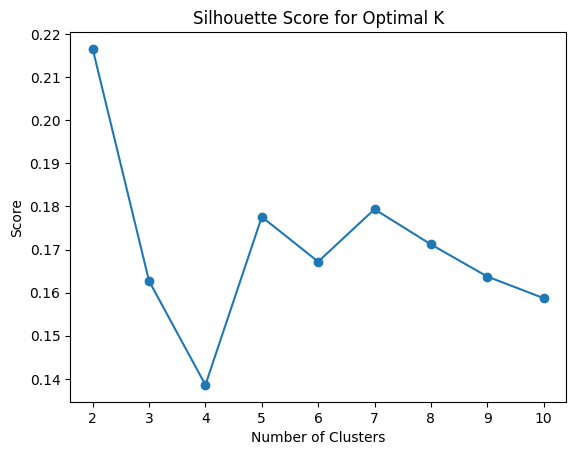

Clustering complete. Number of clusters: 5


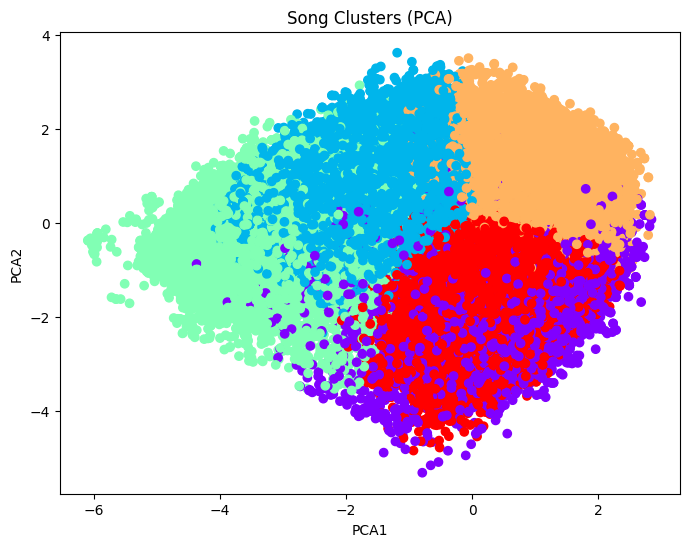

                      track_name                          artists track_genre  \
81031               Shape of You                       Ed Sheeran         pop   
80050                    Ajab Si                               KK    pop-film   
81250  Levitating (feat. DaBaby)                  Dua Lipa;DaBaby         pop   
81256                      Jugni  Diljit Dosanjh;Diamond Platnumz         pop   
81114                Out of Time                       The Weeknd         pop   

       similarity  
81031    1.000000  
80050    0.992774  
81250    0.992774  
81256    0.986277  
81114    0.985833  
Clustered dataset saved as clustered_songs.csv


In [2]:

# 🎧 BeatBuddy: Core Music Recommendation System using Unsupervised Learning

## Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

## Step 2: Load Dataset
# Replace 'dataset.csv' with your dataset file path
df = pd.read_csv('dataset.csv')
print('Data loaded successfully!')
print(df.head())

## Step 3: Data Cleaning
# Drop missing values and duplicates
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
print('Cleaned dataset shape:', df.shape)

## Step 4: Feature Selection
# Select numerical audio features (adjust based on your dataset)
features = ['danceability', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'popularity']
df_features = df[features]

## Step 5: Data Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_features)

## Step 6: K-Means Clustering
# Determine optimal number of clusters using silhouette score
scores = []
for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_features)
    score = silhouette_score(scaled_features, model.labels_)
    scores.append(score)

plt.plot(range(2, 11), scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

# Choose optimal K based on visualization or highest score
k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

print('Clustering complete. Number of clusters:', k_optimal)

## Step 7: PCA Visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
plt.figure(figsize=(8,6))
plt.scatter(pca_features[:,0], pca_features[:,1], c=df['cluster'], cmap='rainbow')
plt.title('Song Clusters (PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

## Step 8: Recommendation Function
def recommend(song_name, n_recommendations=5):
    if song_name not in df['track_name'].values:
        return "Song not found in dataset."
    
    song_cluster = df.loc[df['track_name'] == song_name, 'cluster'].values[0]
    cluster_songs = df[df['cluster'] == song_cluster]
    
    song_vector = scaled_features[df[df['track_name'] == song_name].index[0]].reshape(1, -1)
    cluster_vectors = scaled_features[cluster_songs.index]
    similarities = cosine_similarity(song_vector, cluster_vectors)[0]
    
    cluster_songs = cluster_songs.copy()
    cluster_songs['similarity'] = similarities
    recommendations = cluster_songs.sort_values(by='similarity', ascending=False).head(n_recommendations + 1)
    
    return recommendations[['track_name', 'artists', 'track_genre', 'similarity']].iloc[1:]

## Step 9: Test Recommendation
print(recommend('Shape of You'))  # Replace with a song from your dataset

## Step 10: Save Results
df.to_csv('clustered_songs.csv', index=False)
print('Clustered dataset saved as clustered_songs.csv')
